# Aerofit Case Study

Analyzing the given Aerofit Treadmill dataset, I'd like to explicitly answer the following questions:


1. Import the dataset and do usual data analysis.

> Find the data type of all columns.

> Find the number of rows and columns in the given dataset.

> Check for the missing values.



---



2. Univariate Analysis and Outliers detection.

> Continuous variables.

>  Find the outliers for every continuous variable in the dataset.

>  Remove/clip the data between the 5 percentile and 95 percentile.

> Categorical variables.



---



3. Check the effect of features on the product purchased (Bivariate analysis).

>  Find if there is any relationship between the categorical variables and the output variable in the data.

>  Find if there is any relationship between the continuous variables and the output variable in the data.



---



4. Representing the Probability.

>  Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781).

>  Find the probability that the customer buys a product based on each column.

>  Find the conditional probability that an event occurs given that another event has occurred.



---




5. Multivariate Analysis.




---



6. Check the correlation among different factors.

>  Find the correlation between the given features in the table.



---



7. Customer profiling and recommendation.

>  Make customer profilings for each and every product.

>  Write a detailed recommendation from the analysis that you have done.







In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get the dataset (csv file) from the link

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv

--2024-01-11 23:26:52--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.238.59.71, 18.238.59.132, 18.238.59.211, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.238.59.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-01-11 23:26:53 (220 MB/s) - ‘aerofit_treadmill.csv’ saved [7279/7279]



# General Analysis

In [3]:
df = pd.read_csv("aerofit_treadmill.csv")
df.shape

(180, 9)

**Insights/Conclusion:** Dataset has 180 rows and 9 columns.

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Insights/Conclusion:**


*  String Datatypes: `Product`, `Gender` and `MaritalStatus` columns store categorical data.

*  Integer Datatypes: `Age`, `Education`, `Usage`, `Fitness`, `Income` and `Miles` columns hold numerical values.




In [7]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Insights/Conclusion:**
The dataset is complete, containing no null or missing values across all columns.

# Univariate Analysis

## Continuous variables

In [8]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


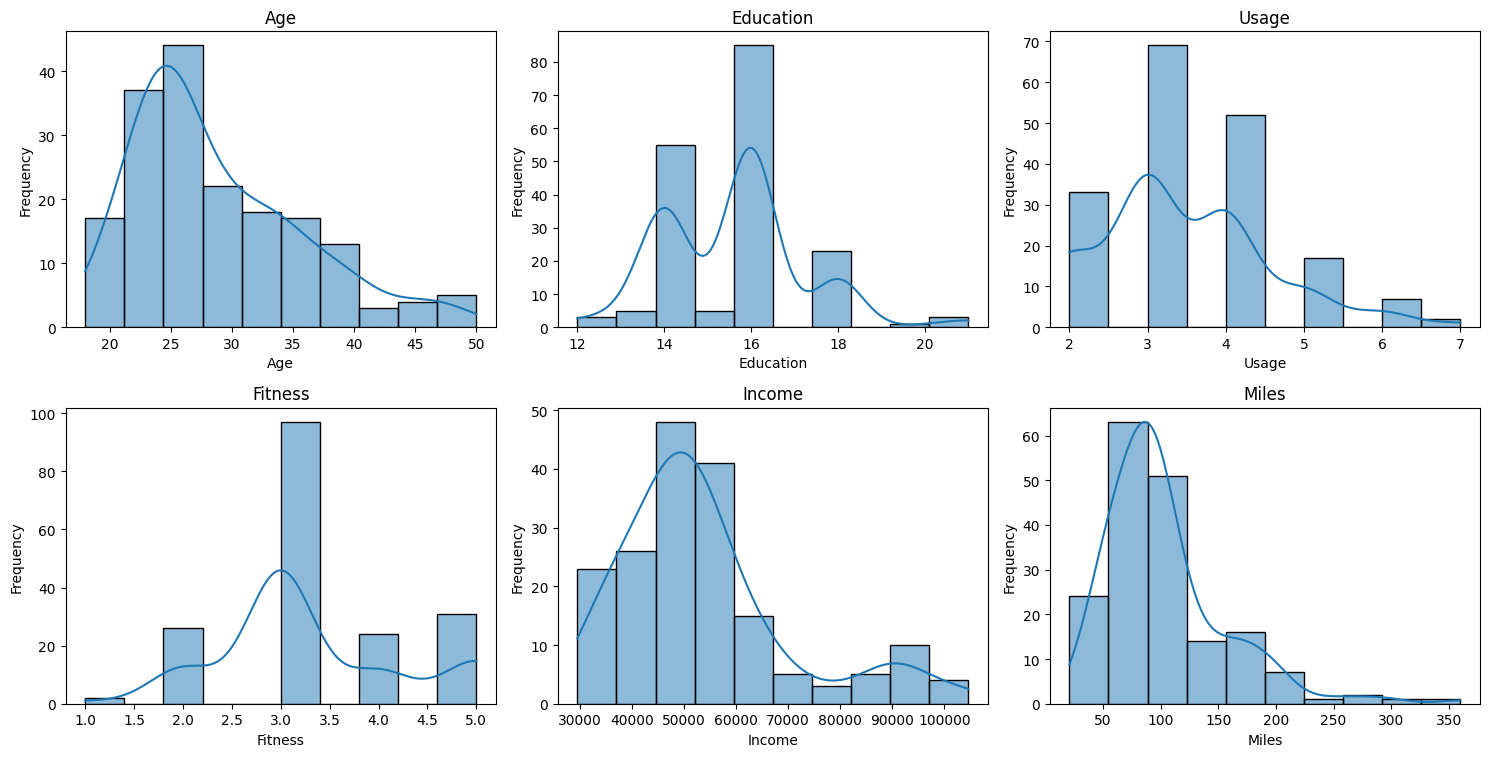

In [9]:
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms for each continuous variable
for i, var in enumerate(continuous_vars):
    sns.histplot(df[var], ax=axes[i], bins=10, kde=True)
    axes[i].set_title(var)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insights/Conclusion:**


*  The dataset includes individuals aged 18-50, with an average age of 28.79 years. The majority are below 33 years old.

*  Education levels range from 12 to 21, with the majority at 16 years.

*  Usage values range from 2 to 7, with the 25th and 75th percentiles at 3 and 4.

*  Most individuals have moderate fitness.

*  Income ranges from \$29,562 to \$104,581, with the 25th and 75th percentiles at \$44,058.75 and \$58,668, respectively.

## Outliers detection using box plot

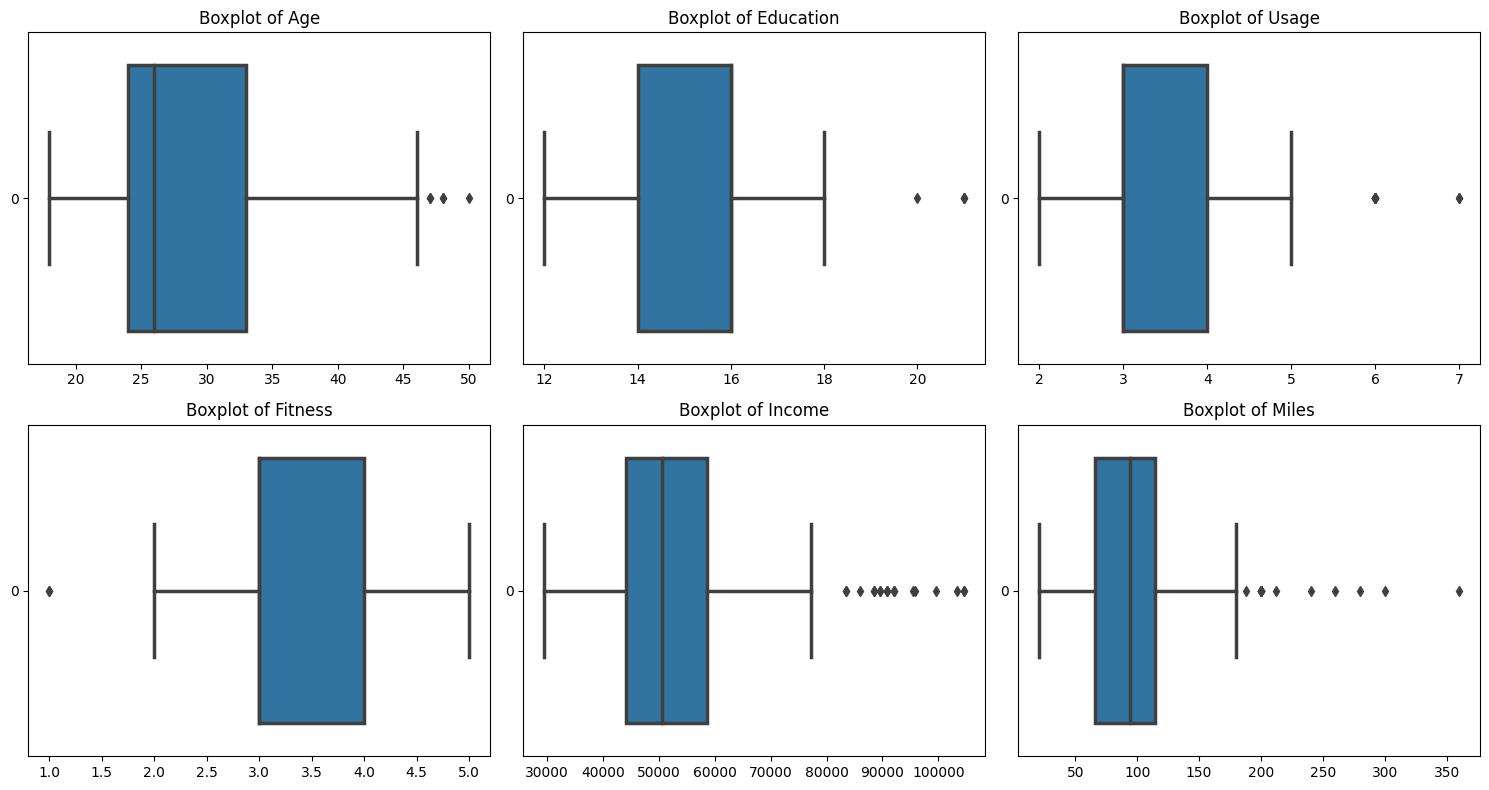

In [10]:
# Selecting continuous variables for outlier detection
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Iterating through each variable and plotting boxplots in subplots
for idx, var in enumerate(continuous_vars):
    row = idx // 3  # Calculate row index
    col = idx % 3   # Calculate column index

    sns.boxplot(data=df[var], ax=axes[row, col], orient='h', linewidth=2.5)
    axes[row, col].set_title(f'Boxplot of {var}')

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

**Insights/Conclusion:**


*   `Education`, `Usage`, `Fitness`: Show minimal outliers, indicating a relatively stable distribution within expected ranges.

*   `Age`: Contains a moderate number of outliers, suggesting some deviation from the typical range.

*   `Income`, `Miles`: Exhibit a substantial number of outliers, signifying significant deviations from the expected distribution.

In [11]:
# Selecting continuous variables for clipping
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Clipping data between 5th and 95th percentiles for each variable
for var in continuous_vars:
    lower_bound = np.percentile(df[var], 5)  # Calculate the 5th percentile
    upper_bound = np.percentile(df[var], 95)  # Calculate the 95th percentile

    # Clip the data between the calculated percentiles
    df[var] = np.clip(df[var], lower_bound, upper_bound)

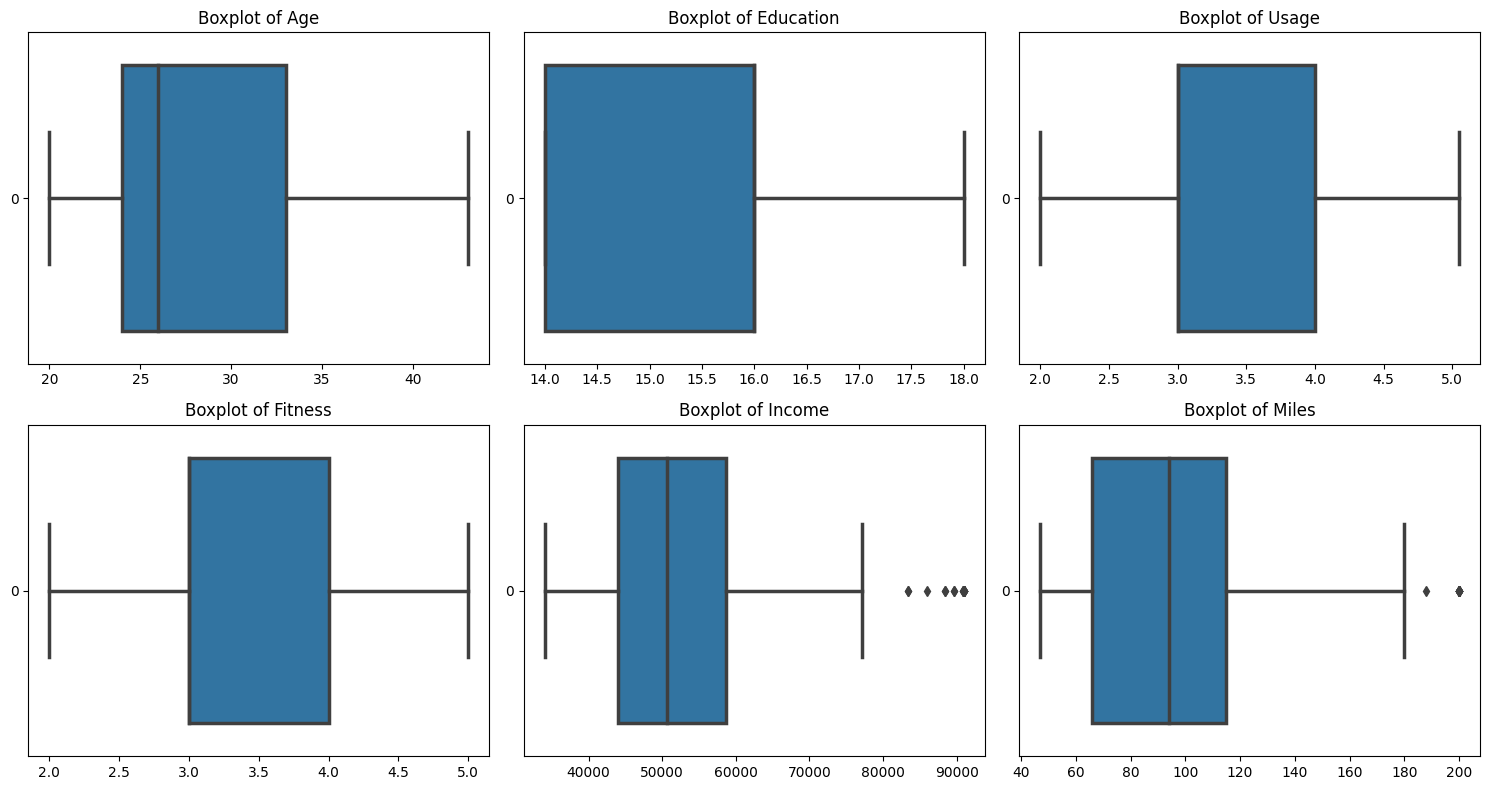

In [12]:
# Selecting continuous variables for outlier detection
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Iterating through each variable and plotting boxplots in subplots
for idx, var in enumerate(continuous_vars):
    row = idx // 3  # Calculate row index
    col = idx % 3   # Calculate column index

    sns.boxplot(data=df[var], ax=axes[row, col], orient='h', linewidth=2.5)
    axes[row, col].set_title(f'Boxplot of {var}')

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

**Insights/Conclusion:**


*   `Age`, `Education`, `Usage`, `Fitness`: Outliers have been successfully clipped, ensuring a more normalized distribution within expected ranges.


*   `Income`, `Miles`: Although some outliers were clipped, these variables still contain remaining outliers, suggesting persistent deviations beyond the 5th and 95th percentiles.

## Categorical variables

In [13]:
df[['Product', 'Gender', 'MaritalStatus']].apply(lambda x: x.value_counts()).T.stack()

Product        KP281         80.0
               KP481         60.0
               KP781         40.0
Gender         Female        76.0
               Male         104.0
MaritalStatus  Partnered    107.0
               Single        73.0
dtype: float64

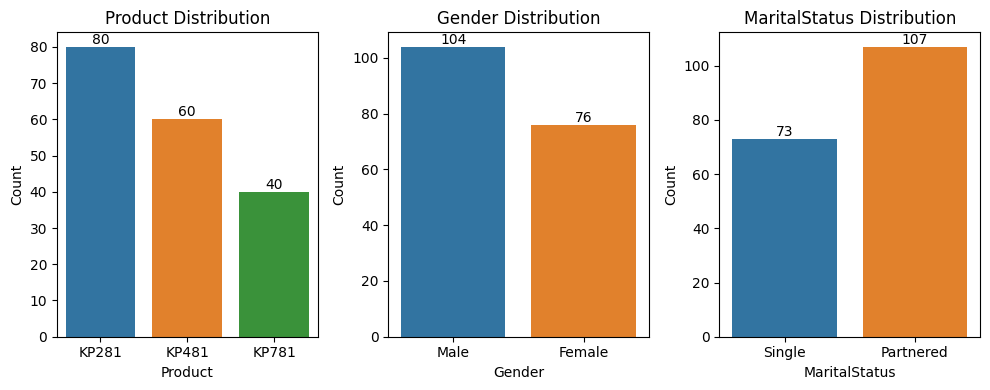

In [14]:
categorical_vars = ['Product', 'Gender','MaritalStatus']

# Create subplots for count plots of categorical variables
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_vars), figsize=(10, 4))

for i, var in enumerate(categorical_vars):
    ax=sns.countplot(x=var,data=df, ax=axes[i])
    ax.bar_label(ax.containers[0], fontsize=10)
    axes[i].set_title(f'{var} Distribution')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Insights/Conclusion:**


*  KP281: Most popular (80 units) due to affordability (\$1,500).

*  KP481: Attracts mid-level runners (\$1,750) with 60 units.

*  KP781: Lower (40 units) due to higher cost (\$2,500) and specialized features.

*  Males are more likely to purchase product as compared to females, with a ratio of around 4:3.

*  A Partnered customer is more likely to purchase the product.

# Bivariate Analysis

## Categorical variables vs Product

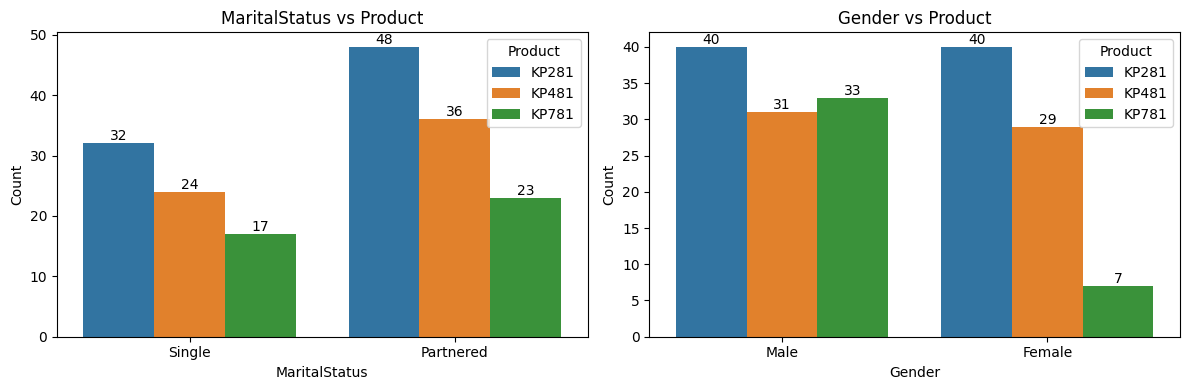

In [15]:
# Categorical variables: MaritalStatus, Gender
categorical_vars = ['MaritalStatus', 'Gender']

# Create subplots for count plots of categorical variables against the output variable
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_vars), figsize=(12, 4))

for i, var in enumerate(categorical_vars):
    ax=sns.countplot(x=var, hue='Product', data=df, ax=axes[i])
    # Add count labels for all containers (bars)
    for container in ax.containers:
        ax.bar_label(container, fontsize=10, fmt='%d')
    axes[i].set_title(f'{var} vs Product')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Product', loc='upper right')

plt.tight_layout()
plt.show()

**Insights/Conclusion:**


*  The majority of both partnered and single individuals opt for KP281, followed by KP481, while KP781 has a comparatively lower distribution in both groups.

*  Both genders prefer KP281, while there's a notable difference in the choice of KP781, with more males opting for it compared to females. KP481 shows a relatively balanced distribution between genders.

## Continuous variables vs Product

In [16]:
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

for var in continuous_vars:
  df_new = df.groupby('Product')[var].describe().reset_index()
  print(f"Product wise {var} description")
  print(df_new,end="\n\n")

Product wise Age description
  Product  count       mean       std   min    25%   50%    75%    max
0   KP281   80.0  28.427500  6.678313  20.0  23.00  26.0  33.00  43.05
1   KP481   60.0  28.801667  6.327830  20.0  24.00  26.0  33.25  43.05
2   KP781   40.0  28.828750  6.296182  22.0  24.75  27.0  30.25  43.05

Product wise Education description
  Product  count       mean       std   min   25%   50%   75%   max
0   KP281   80.0  15.125000  1.071790  14.0  14.0  16.0  16.0  18.0
1   KP481   60.0  15.183333  1.112208  14.0  14.0  16.0  16.0  18.0
2   KP781   40.0  17.050000  1.197219  14.0  16.0  18.0  18.0  18.0

Product wise Usage description
  Product  count      mean       std  min  25%  50%   75%   max
0   KP281   80.0  3.087500  0.782624  2.0  3.0  3.0  4.00  5.00
1   KP481   60.0  3.066667  0.799717  2.0  3.0  3.0  3.25  5.00
2   KP781   40.0  4.511250  0.565401  3.0  4.0  5.0  5.00  5.05

Product wise Fitness description
  Product  count      mean       std  min  25%  50%  75% 

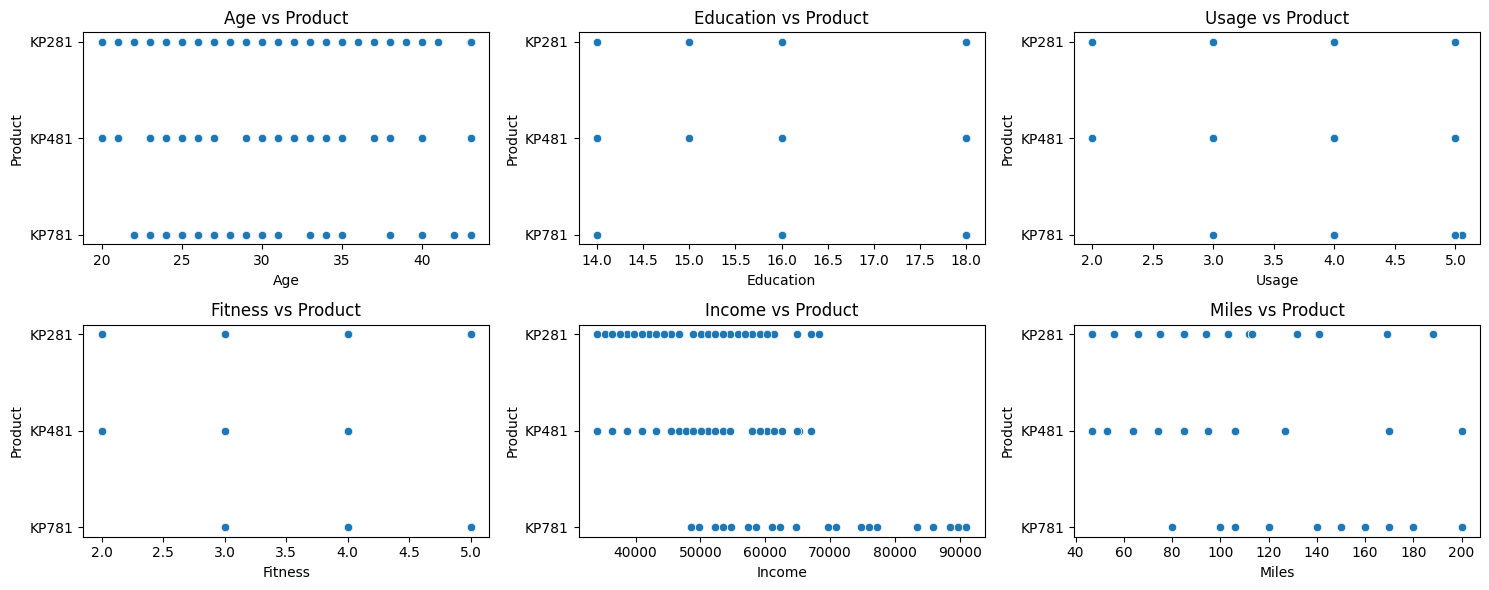

In [17]:
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Create a subplot grid for scatter plots of continuous variables against 'Product'
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

# Flatten the 2D subplot array for easy iteration
axes = axes.flatten()

# Plotting scatter plots for each continuous variable against 'Product'
for i, var in enumerate(continuous_vars):
    sns.scatterplot(x=var, y='Product', data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs Product')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Product')

plt.tight_layout()
plt.show()

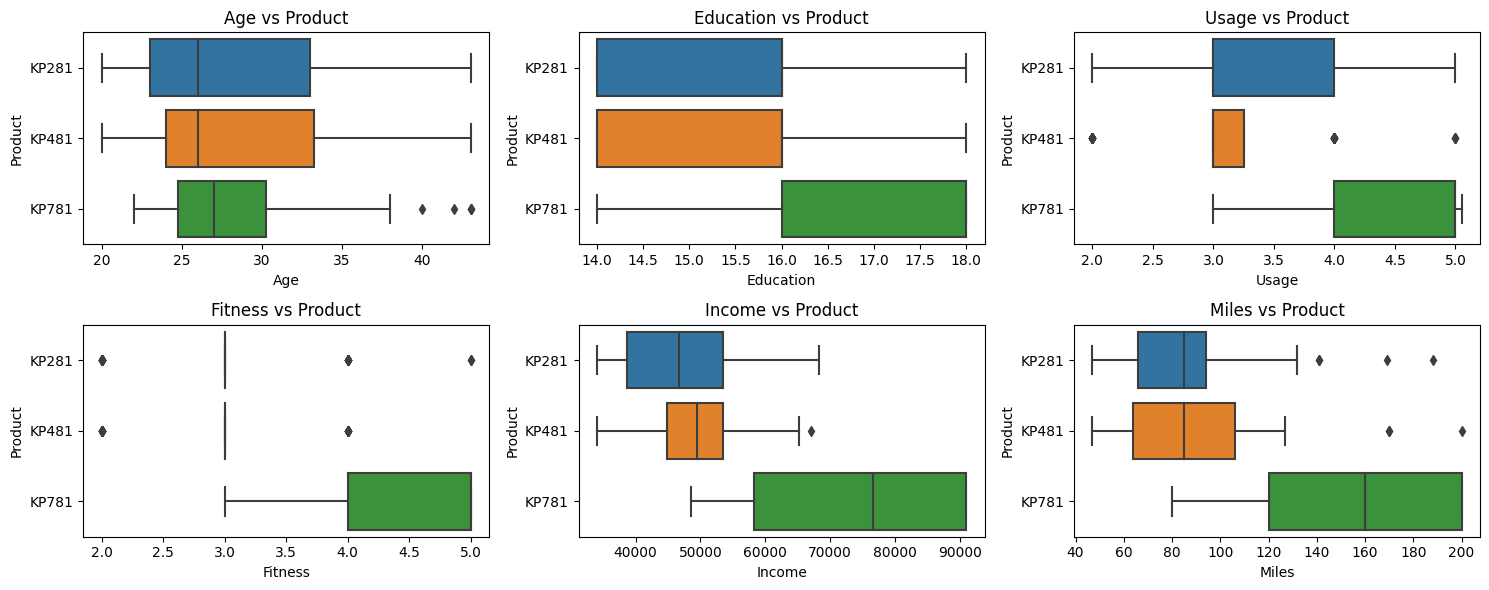

In [18]:
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Create a subplot grid for box plots of continuous variables against 'Product'
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

# Flatten the 2D subplot array for easy iteration
axes = axes.flatten()

# Plotting box plots for each continuous variable against 'Product'
for i, var in enumerate(continuous_vars):
    sns.boxplot(x=var, y='Product', data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs Product')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Product')

plt.tight_layout()
plt.show()

**Insights/Conclusion:**


**`Product vs Age:`**

*  Customers purchasing KP281 and KP481 have same median ages.

*  The age group of 25-30 is associated with a higher chances of purchasing KP781.


**`Product vs Education:`**

*  Customers with education levels greater than 16 are more likely to purchase KP781.

*  Those with education levels below 16 have an equal chances of choosing KP281 or KP481.


**`Product vs Usage:`**

Customers planning to use the treadmill more than four times a week are more likely to purchase KP781, while others are more likely to buy KP281 or KP481.


**`Product vs Fitness:`**

Higher fitness levels (fitness >= 3) increase the chances of purchasing KP781.


**`Product vs Income:`**

* Higher income (Income >= \$60,000) corresponds to a higher chances of choosing KP781.

* The median income for KP281 and KP481 demonstrates similar central tendencies, with KP481 slightly higher.


**`Product vs Miles:`**

Customers expecting to cover more than 120 miles per week are more likely to buy KP781.

# Probability Computation

## Marginal Probability

In [19]:
# Using crosstab()
pd.crosstab(df.Product, columns='count', normalize = True)

col_0,count
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


In [20]:
# Using value_counts()
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [21]:
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [22]:
df['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

**Insights/Conclusion:**


**`Product:`**

*  44.44% of the customers have purchased KP281 treadmill.

*  33.33% of the customers have purchased KP481 treadmill.

*  22.22% of the customers have purchased KP781 treadmill.


**`Gender:`**

57.78% of the customers are Males and 42.22% are Females.


**`MaritalStatus:`**

59.44% of the customers are Partnered and rest are Single.

## Conditional Probability

In [23]:
pd.crosstab(df.Product, df.Gender, normalize = 'columns', margins=True, margins_name='Total')

Gender,Female,Male,Total
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


**Insights/Conclusion:**

P(KP281 | Female) = 0.53

P(KP481 | Female) = 0.38

P(KP781 | Female) = 0.09

=====================

P(KP281 | Male) = 0.38

P(KP481 | Male) = 0.30

P(KP781 | Male) = 0.31

In [24]:
pd.crosstab(df.Product, df.MaritalStatus, normalize = 'columns', margins=True, margins_name='Total')

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.448598,0.438356,0.444444
KP481,0.336449,0.328767,0.333333
KP781,0.214953,0.232877,0.222222


**Insights/Conclusion:**

P(KP281 | Partnered) = 0.45

P(KP481 | Partnered) = 0.34

P(KP781 | Partnered) = 0.21

=====================

P(KP281 | Single) = 0.43

P(KP481 | Single) = 0.33

P(KP781 | Single) = 0.23

In [25]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


In [26]:
# Creating categorical columns for Age, Income and Miles.

age_bins = [0, 10, 20, 30, 40, 50]
df['AgeBin'] = pd.cut(df['Age'], bins = age_bins)

income_bins = [0, 20000, 30000, 40000, 50000, 70000, 100000]
df['IncomeBin'] = pd.cut(df['Income'], bins = income_bins)

miles_bins = [0, 40, 60, 80, 100, 120, 200]
df['MilesBin'] = pd.cut(df['Miles'], bins = miles_bins)

In [27]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeBin,IncomeBin,MilesBin
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112,"(10, 20]","(30000, 40000]","(100, 120]"
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75,"(10, 20]","(30000, 40000]","(60, 80]"
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66,"(10, 20]","(30000, 40000]","(60, 80]"
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85,"(10, 20]","(30000, 40000]","(80, 100]"
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47,"(10, 20]","(30000, 40000]","(40, 60]"


In [28]:
pd.crosstab(df.Product, df['AgeBin'], normalize = 'columns')

AgeBin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]"
Product,,,,
KP281,0.6,0.445455,0.395833,0.500000
KP481,0.4,0.281818,0.479167,0.166667
KP781,0.0,0.272727,0.125000,0.333333


**Insights/Conclusion:**


*  For 10 to 20 years old people, KP281 is  most likely followed by KP481.

*  For 20 to 30 years old people, KP281 is  most likely followed by KP481 and KP781 with around equal probability.

*  For 30 to 40 years old people, KP481 is  most likely followed by KP281.

*  For 40 to 50 years old people, KP281 is  most likely followed by KP781.

In [29]:
pd.crosstab(df.Product, df['IncomeBin'], normalize = 'columns')

IncomeBin,"(30000, 40000]","(40000, 50000]","(50000, 70000]","(70000, 100000]"
Product,,,,
KP281,0.71875,0.490196,0.432432,0.0
KP481,0.28125,0.411765,0.405405,0.0
KP781,0.00000,0.098039,0.162162,1.0


**Insights/Conclusion:**


*  People with a salary above \$70000 will definitely purchase KP781, while those with a salary below \$30000 are more likely to purchase KP281.

*  People having salary between \$40000 to \$70000 are more likely to purchase KP281 or KP481.

In [30]:
pd.crosstab(df.Product, df['MilesBin'], normalize = 'columns')

MilesBin,"(40, 60]","(60, 80]","(80, 100]","(100, 120]","(120, 200]"
Product,,,,,
KP281,0.6,0.666667,0.444444,0.500000,0.142857
KP481,0.4,0.300000,0.425926,0.333333,0.190476
KP781,0.0,0.033333,0.129630,0.166667,0.666667


**Insights/Conclusion:**

Users running over 120 miles a week are most likely to buy KP781, while rest all are likely to buy KP281 or KP481.

In [31]:
pd.crosstab(df.Product, df.Usage, normalize = 'columns')

Usage,2.00,3.00,4.00,5.00,5.05
Product,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0
KP481,0.424242,0.449275,0.230769,0.176471,0.0
KP781,0.000000,0.014493,0.346154,0.705882,1.0


**Insights/Conclusion:**

*  Users over 4 times a week are most likely to buy KP781.

*  Users twice/thrice a week are most likely to buy KP281 or KP481.

*  Users 4 times weekly have nearly equal distribution.

In [32]:
pd.crosstab(df.Product, df.Fitness, normalize = 'columns')

Fitness,2,3,4,5
Product,,,,
KP281,0.535714,0.556701,0.375000,0.064516
KP481,0.464286,0.402062,0.333333,0.000000
KP781,0.000000,0.041237,0.291667,0.935484


**Insights/Conclusion:**

*  Users with fitness scale 5 are most likely to buy KP781.

*  Users with fitness scale 2/3 are most likely to buy KP281 or KP481.

*  Users with fitness scale 4 have nearly equal distribution.

In [33]:
pd.crosstab(df.Product, df.Education, normalize = 'columns')

Education,14,15,16,18
Product,,,,
KP281,0.555556,0.8,0.458824,0.074074
KP481,0.412698,0.2,0.364706,0.074074
KP781,0.031746,0.0,0.176471,0.851852


**Insights/Conclusion:**

Users with education over 16 years are most likely to buy KP781, while rest are likely to buy KP281 or KP481.

# Multivariate Analysis

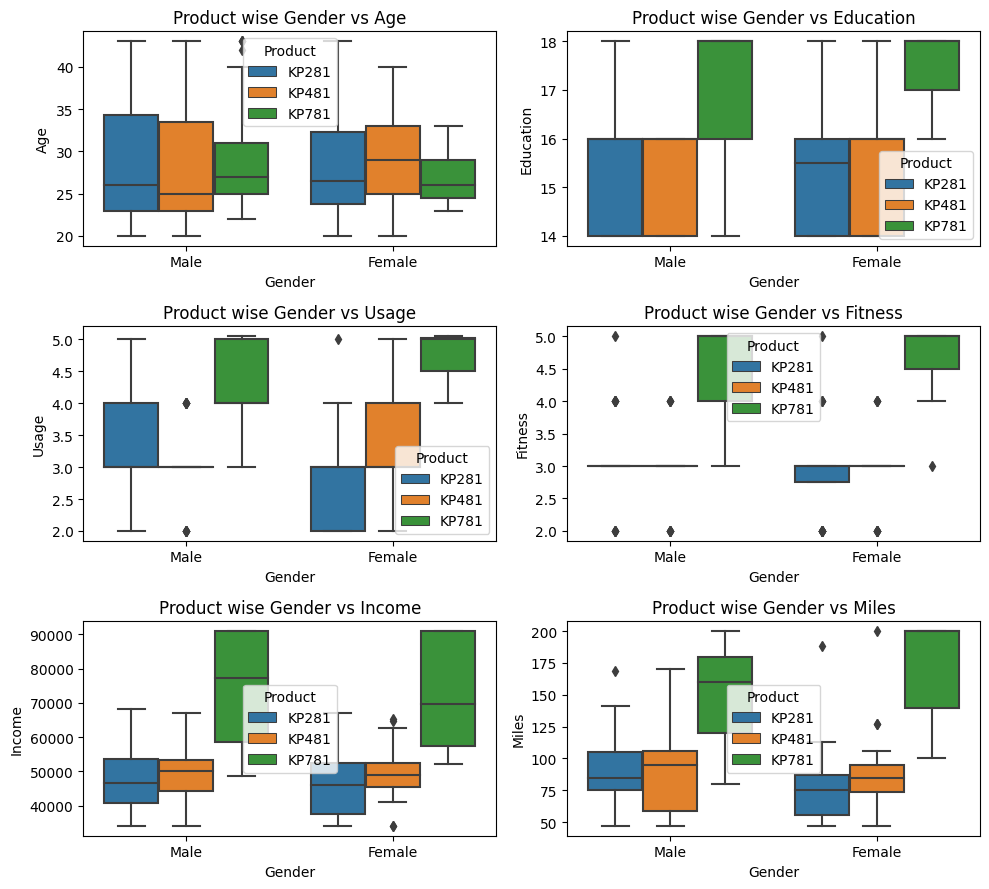

In [34]:
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Create a subplot grid for box plots of 'Gender' against continuous variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 9))

# Flatten the 2D subplot array for easy iteration
axes = axes.flatten()

# Plotting box plots for each 'Gender' against continuous variables
for i, var in enumerate(continuous_vars):
    sns.boxplot(data=df, x='Gender', y=var, hue='Product', ax=axes[i])
    axes[i].set_title(f'Product wise Gender vs {var}')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

**Insights/Conclusion:**


*  The KP781 product is primarily purchased by individuals under 30 due to health concerns or atheletes. Males beyond 40 buy it for income, while no female over 35 buys it.

*  KP481 is primarily purchased by those with good income and around 30 years of age, while KP281 is primarily purchased by those under 27 years old.

*  KP781 is a popular product among males with high salaries, while those with lower salaries are more likely to purchase KP281.

*  The boxplot shows that fitness enthusiasts and health conscious individuals are purchasing KP781, regardless of gender.

*  KP281 is primarily purchased by females running less miles and looking to stay in shape. Male customers, running less than 100 miles a week, tend to purchase KP281, while those running below 150 miles and above 100 miles will purchase KP481.

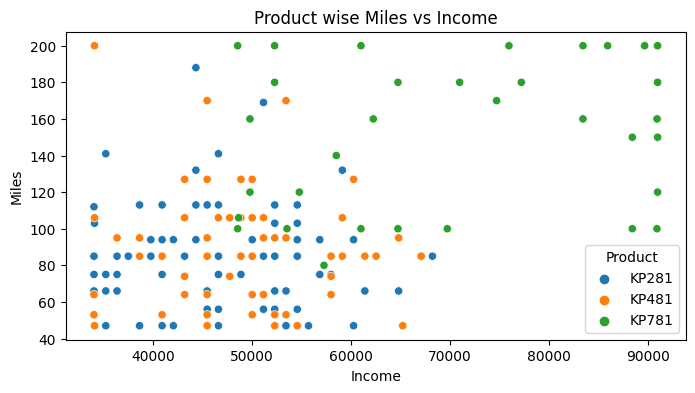

In [35]:
plt.figure(figsize = (8, 4))
sns.scatterplot(data = df, x = 'Income',y = 'Miles', hue = 'Product')
plt.title(f'Product wise Miles vs Income')
plt.show()

**Insights/Conclusion:**

KP781 buyers have high incomes and run more miles, while KP281 and KP481 buyers have incomes less than \$700,000 and are mostly running for good health.

# Correlation among different factors

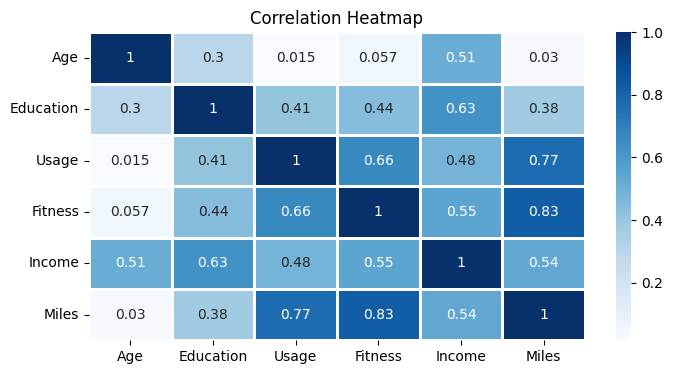

In [36]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues',edgecolors='black',linewidths=1)
plt.title('Correlation Heatmap')

plt.show()

**Insights/Conclusion:**


*  Positive correlations exist between age and income (0.51) and education and income (0.63).

*  Strong positive correlations between usage and fitness (0.66) and usage and miles (0.77) indicate exercise-related patterns.

*  Miles and fitness exhibit a strong positive correlation (0.83).

# Customer profiling and recommendation

## Customer profiling

**KP281:**

`Demographics:` Predominantly purchased by individuals under 30.

`Gender:` No distinct gender bias; popular among both males and females.

`Income:` Attracts individuals with incomes below \$70,000.

`Education:` No specific education bias; preferred across various education levels.

`Fitness & Health:` Attracts individuals running less than 100 miles per week, focusing on health and moderate fitness.

`Usage:` Customers planning to use the treadmill 2-4 times a week.



---



**KP481:**

`Demographics:` Attracts individuals around 30 years old.

`Gender:` No distinct gender bias; balanced distribution between males and females.

`Income:` Appeals to those with moderate to high incomes (\$40,000 to \$70,000).

`Education:` No specific education bias; preferred across various education levels.

`Fitness & Health:` Preferred by individuals with moderate fitness.

`Usage:` Balanced distribution among customers planning to use the treadmill 2-4 times a week.



---



**KP781:**

`Demographics:` Primarily purchased by males, especially those beyond 40.

`Gender:` Skewed towards males; fewer females choose this product.

`Income:` Attracts individuals with higher incomes (above \$70,000).

`Education:` More popular among individuals with education levels above 16 years.

`Fitness & Health:` Attracts fitness enthusiasts, individuals running over 120 miles per week.

`Usage:` Preferred by customers planning to use the treadmill more than 4 times a week.

## Recommendations

**Product Strategy:**

*  Focus on promoting KP281 as an affordable and versatile option for a wide age group.

*  Emphasize the mid-level running features of KP481 to attract customers in their 30s.

*  Position KP781 as a premium product with specialized features, targeting fitness enthusiasts and higher-income individuals.


**Income-Based Strategies:**

Develop targeted strategies for income groups:

*  For high-income individuals (> \$70,000), emphasize the advanced features and benefits of KP781.

*  For those with lower incomes (< \$30,000), highlight the affordability and basic features of KP281.


**Educational Marketing:**

*  Tailor marketing messages to individuals with education levels above 16, focusing on the advanced features of KP781.

*  For those with education levels below 16, emphasize the versatility and affordability of KP281 and KP481.


**Usage Patterns:**

*  Consider promoting KP781 to customers planning to use the treadmill more than four times a week, emphasizing its durability and advanced features.

*  For customers using the treadmill two to three times a week, highlight the affordability and basic features of KP281 or mid-level features of KP481.


**Fitness Enthusiasts:**

*  Leverage the positive correlation between fitness level and KP781 purchases by targeting fitness enthusiasts.

*  Promote KP781 as the choice for individuals seeking an advanced workout experience.


**Miles and Usage Correlation:**

Capitalize on the strong correlation between miles covered and fitness levels to market KP781 to individuals running over 120 miles per week.


**Partnered vs. Single Preferences:**

Consider different marketing strategies for partnered and single individuals:

*  Partnered individuals tend to prefer KP281, so emphasize its family-friendly features.

*  Single individuals show a more balanced preference; highlight the unique features of KP781.


**Continuous Monitoring:**

Regularly monitor sales data and customer feedback to adapt marketing strategies based on evolving preferences and market trends.


**In-Store Experience:**

Enhance the in-store experience for customers by providing product demonstrations, allowing them to experience the unique features of KP781.


**Diversity in Product Line:**

*  Consider introducing more products with different price points to cater to a broader audience.

*  Conduct market research to identify potential gaps in the product line and consumer preferences.